In [18]:
# Add directory above current directory to path
import sys

sys.path.insert(0, "..")

from sunflower.song_loader import Song, load_from_disk
from sunflower.song_analyzer import SongAnalyzer
from sunflower.utils import export_wav
from sunflower.benchmark import run_benchmark
from sunflower.song_visualizer import visualize_waveform
import plotly.graph_objects as go
import numpy as np
import librosa
import soundfile as sf

# Autoreloading for easier development

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Song loading & analysis

In [27]:
# Loading example file

raw_audio, extension = load_from_disk("../data/piano_75.wav")

song = Song(raw_audio, extension)

song.print_attributes()

waveform: [[ 2.38418579e-07  2.38418579e-07]
 [ 9.53674316e-07  7.15255737e-07]
 [-4.77768481e-07 -9.31322575e-10]
 ...
 [-1.59749761e-05  1.31130219e-05]
 [-1.14450231e-05  1.12056732e-05]
 [-1.90827996e-06  4.52995300e-06]], mono_waveform: [  256.   896.  -257. ... -1537.  -129.  1407.], extension: wav, channels: 2, sr: 44100, sample_width: 4


In [28]:
# Analyzing song

song_analyzer = SongAnalyzer(song)
song_analyzer.detect_tempo()

print(song_analyzer.tempo)

74.89809782608695


In [29]:
song_analyzer.beat_frames

array([   5,   72,  141,  210,  279,  349,  417,  485,  554,  623,  692,
        761,  831,  899,  967, 1036, 1105, 1174, 1243, 1312, 1384, 1451,
       1519, 1588, 1657, 1725, 1794, 1863, 1932, 2001, 2070])

## Waveform visualization

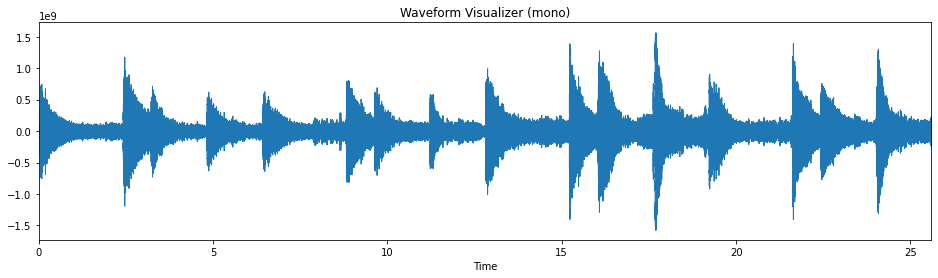

In [30]:
visualize_waveform(song)

In [37]:
stereo = False
rate = 30

left = [point[0] for point in song.waveform[0::rate]]
right = [point[1] for point in song.waveform[0::rate]]
mono = (np.array(left) + np.array(right)) / 2
x = np.arange(0, len(mono)) * rate / song.sr

if stereo:
    data = [
        go.Scatter(x=x, y=left, name="Left"),
        go.Scatter(x=x, y=right, name="Right"),
    ]
else:
    data = [go.Scatter(x=x, y=mono, name="Mono")]

fig = go.Figure(data=data)

beats = librosa.frames_to_time(song_analyzer.beat_frames, song.sr)

fig.add_trace(
    go.Scatter(
        x=beats,
        y=np.zeros(len(beats)),
        mode="markers",
        marker_symbol="diamond-tall",
        marker_size=10,
        name="Beat Rythm"
    )
)

fig.update_layout(title=f"Waveform Visualizer <br>BPM :{round(song_analyzer.tempo,0)}")
fig.show()

## Benchmark

In [ ]:
run_benchmark()